# MNIST Nueral Network using Numpy & Pandas.

<font size="3">In this notebook, I implemented a simple Nueral Network using only Numpy & pandas and trained it on the MNIST dataset to identify hand written digits.</font>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv') #training data

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

# Validation set
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

# Training set
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

<font size="3">The Nueral Network below has a three-layer architecture. Input layer  a $^{[0]}$ has 784 units corresponding to the 784 pixels in each 28x28 input image. First hidden layer  a $^{[1]}$ has 10 units with ReLU activation, Second hidden layer  a $^{[2]}$ has 10 units with ReLU activation and finally the output layer  a $^{[3]}$ has 10 units corresponding to the ten digit classes with softmax activation.</font>

In [3]:
def init_params():
    # Initializing weights and biases
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(128, 10) - 0.5
    b2 = np.random.rand(128, 1) - 0.5
    W3 = np.random.rand(10, 128) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    # Rectified Linear Unit (activation function)
    return np.maximum(0, Z)

def softmax(Z):
    # Softmax for getting probabilities
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    #Assigns '1' at the correct digit's place
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    

**Forward propagation :**
$$
Z^{[1]}=W^{[1]}X+b^{[1]}$$
$$
A^{[1]}=g_{ReLU}(Z^{[1]})$$
$$
Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$$
$$
A^{[2]}=g_{ReLU}(Z^{[2]})$$
$$
Z^{[3]}=W^{[3]}A^{[2]}+b^{[3]}$$
$$
A^{[3]}=g_{softmax}(Z^{[3]})
$$

In [4]:
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

**Backward propagation :**
$$
dZ^{[3]}=A^{[3]}−Y$$
$$
dW^{[3]}=\frac{1}{m}dZ^{[3]}A^{[2]}T$$
$$
db^{[3]}=\frac{1}{m}ΣdZ^{[3]}$$
$$
dZ^{[2]}=W^{[3]}TdZ^{[3]}.∗g^{[1]}′(z^{[2]})$$
$$
dW^{[2]}=\frac{1}{m}dZ^{[2]}A^{[1]}T$$
$$
db^{[2]}=\frac{1}{m}ΣdZ^{[2]}$$
$$
dZ^{[1]}=W^{[2]}TdZ^{[2]}.∗g^{[1]}′(z^{[1]})$$
$$
dW^{[1]}=\frac{1}{m}dZ^{[1]}A^{[0]}T$$
$$
db^{[1]}=\frac{1}{m}ΣdZ^{[1]}
$$

In [5]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

**Parameter updates :**
$$
W^{[3]}:=W^{[3]}−αdW^{[3]}$$
$$
b^{[3]}:=b^{[3]}−αdb^{[3]}$$
$$
W^{[2]}:=W^{[2]}−αdW^{[2]}$$
$$
b^{[2]}:=b^{[2]}−αdb^{[2]}$$
$$
W^{[1]}:=W^{[1]}−αdW^{[1]}$$
$$
b^{[1]}:=b^{[1]}−αdb^{[1]}
$$

In [6]:
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2   
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3 
    return W1, b1, W2, b2, W3, b3

**Gradient descent :**

In [7]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

In [8]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [18]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.10, 1500)

Iteration:  0
[1 6 7 ... 6 6 6] [2 2 2 ... 1 8 5]
0.11034146341463415
Iteration:  10
[2 3 3 ... 3 8 6] [2 2 2 ... 1 8 5]
0.22070731707317073
Iteration:  20
[7 3 3 ... 1 8 6] [2 2 2 ... 1 8 5]
0.3210731707317073
Iteration:  30
[2 3 3 ... 1 8 6] [2 2 2 ... 1 8 5]
0.40263414634146344
Iteration:  40
[2 9 8 ... 1 8 6] [2 2 2 ... 1 8 5]
0.4676585365853659
Iteration:  50
[2 6 2 ... 1 8 0] [2 2 2 ... 1 8 5]
0.5137804878048781
Iteration:  60
[2 2 4 ... 1 8 0] [2 2 2 ... 1 8 5]
0.555439024390244
Iteration:  70
[2 2 4 ... 1 8 0] [2 2 2 ... 1 8 5]
0.5890731707317073
Iteration:  80
[2 2 4 ... 1 8 0] [2 2 2 ... 1 8 5]
0.6178536585365854
Iteration:  90
[2 2 4 ... 1 8 0] [2 2 2 ... 1 8 5]
0.6443414634146342
Iteration:  100
[2 2 4 ... 1 8 4] [2 2 2 ... 1 8 5]
0.6664634146341464
Iteration:  110
[2 2 4 ... 1 8 4] [2 2 2 ... 1 8 5]
0.6825853658536586
Iteration:  120
[2 2 2 ... 1 8 0] [2 2 2 ... 1 8 5]
0.6643170731707317
Iteration:  130
[2 2 2 ... 1 8 4] [2 2 2 ... 1 8 5]
0.6958048780487804
Iteration:  140

In [19]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


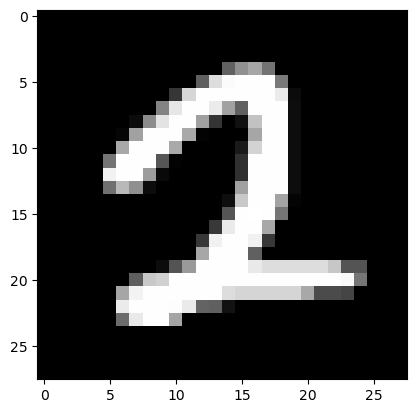

Prediction:  [2]
Label:  2


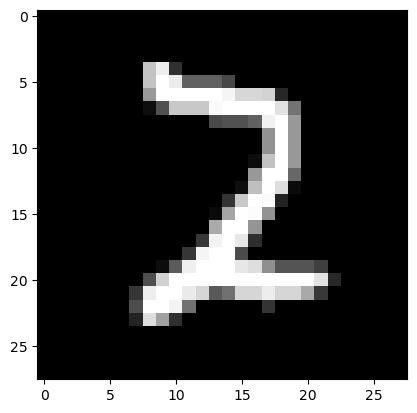

Prediction:  [2]
Label:  2


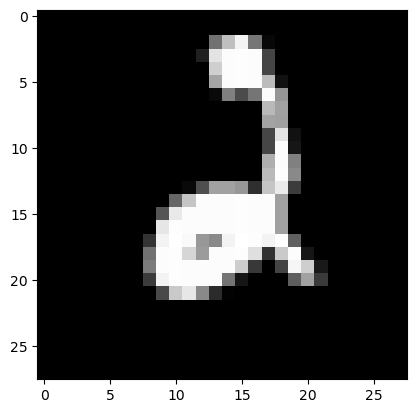

Prediction:  [5]
Label:  8


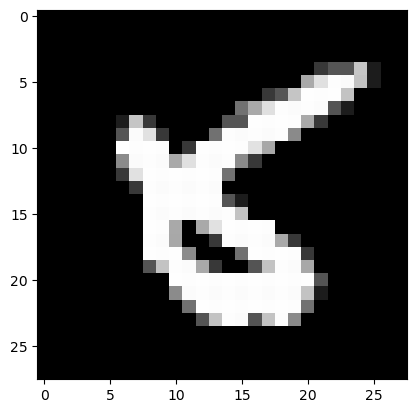

In [20]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)

In [21]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[1 2 9 3 0 7 0 0 9 0 1 0 6 1 9 6 1 1 1 1 7 5 4 7 6 1 4 8 2 0 4 1 1 1 8 8 7
 1 5 9 4 7 3 4 3 0 6 4 8 8 9 5 9 5 8 0 3 2 2 2 3 4 0 4 3 2 0 7 4 1 7 1 4 4
 2 4 1 4 1 5 1 1 9 1 2 5 7 9 6 1 8 6 9 6 8 5 1 6 5 2 7 0 4 5 5 4 2 5 0 4 5
 6 9 5 6 9 1 6 4 5 6 4 3 2 0 8 6 3 6 9 3 6 9 3 6 9 9 0 1 6 8 9 4 6 8 7 7 6
 4 7 4 1 5 0 3 6 2 6 3 2 5 9 5 8 1 2 1 3 6 1 3 6 5 9 2 4 8 0 5 4 6 3 7 8 2
 5 8 2 0 5 7 8 2 8 0 1 7 6 4 4 6 5 6 5 7 9 7 9 0 2 5 9 1 4 6 4 8 9 1 8 2 0
 6 5 2 4 5 2 5 7 3 8 5 6 4 7 4 7 1 6 7 3 7 7 5 0 0 5 9 3 3 8 8 5 8 0 8 5 7
 1 3 7 8 2 2 4 1 6 0 4 9 8 8 1 0 7 7 6 7 9 6 4 1 8 5 6 4 6 9 5 6 2 3 7 0 4
 4 1 5 0 6 3 2 7 4 6 0 2 0 3 7 5 3 4 7 4 6 2 5 7 2 2 2 9 9 9 9 9 9 0 1 4 2
 1 5 7 9 2 7 5 8 4 2 9 9 0 5 1 9 9 7 8 9 5 1 6 8 9 6 9 7 1 8 0 0 8 7 1 2 1
 5 0 9 1 7 9 5 6 1 1 8 8 0 6 3 4 3 4 6 9 5 7 5 0 3 8 6 1 4 4 9 7 8 6 3 9 9
 5 5 1 0 3 8 2 9 3 4 2 4 6 8 0 7 0 9 5 2 5 7 3 5 4 3 4 9 6 1 7 6 9 1 0 9 2
 7 7 9 1 0 4 4 7 9 3 1 1 6 1 7 4 6 5 8 8 2 7 9 8 0 8 5 8 4 3 4 7 5 5 1 4 2
 8 7 1 4 9 4 4 4 4 0 9 8 

0.93